### Тестовый стенд
* **CPU:** AMD® Ryzen 5 5500U with Radeon Graphics x 12 @ 4GHz

* **RAM:** 8 GB

* **OS:** Ubuntu 23.04 (64-bit)

### Подготовка к измерениям

**Средство измерения:** библиотека Googlebenchmark

Перед проведением замеров, были проделаны следующие действия:

* отключены все обновления на устройстве;
* закрыты фоновые процессы;
* установлена максимальная частота процессора:
```bash
sudo cpupower frequency-set --governor performance
```
* выключен swap:
```bash
sudo swapoff -a
```
* сброшен дисковый кэш:
```bash
sudo sh -c 'echo 3 >/proc/sys/vm/drop_caches'
```
* отключен GUI:
``` bash
sudo systemctl isolate runlevel1.target
su -l shalasheg
```
* программа исполнена одним ядром:
```bash
taskset -c 0 ./DPLL --benchmark_context=pwd='pwd'  --benchmark_repetitions=50 --benchmark_out='bencmarkout.txt'
```
* совершён прогрев из 10 проходов.


**Выборка** - 40 замеров

In [4]:
t = [26543.914345000303, 26371.122442999877, 26529.03783599959, 26723.351760000696, 26255.870783999853, 26278.494918999968, 26317.891426000642, 26477.86270600045, 26304.11875400023, 26257.286007000403, 26274.64643500025, 26198.28560299993, 26439.029379000203, 26336.870365999857, 26630.752301999564, 26276.95485499953, 26456.940454000687, 26254.520583000158, 26293.1787969992, 26170.374854999864, 26278.20360899932, 26579.421366000133, 26620.333167000354, 26141.16038500015, 26319.15682499948, 26347.09073400063, 26413.24926299967, 26548.337305000132, 26334.768890000305, 26292.413891999786, 26337.68398200027, 26644.411616999605, 26336.887692000346, 26441.432655000426, 26305.57484000019, 26629.242180999427, 26374.280312000337, 26339.447456000016, 26365.18380334004, 26333.710420999978]

In [5]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

(array([ 3.,  3.,  8., 11.,  2.,  4.,  3.,  1.,  4.,  1.]),
 array([26141.160385 , 26199.3795225, 26257.59866  , 26315.8177975,
        26374.036935 , 26432.2560725, 26490.47521  , 26548.6943475,
        26606.913485 , 26665.1326225, 26723.35176  ]),
 <BarContainer object of 10 artists>)

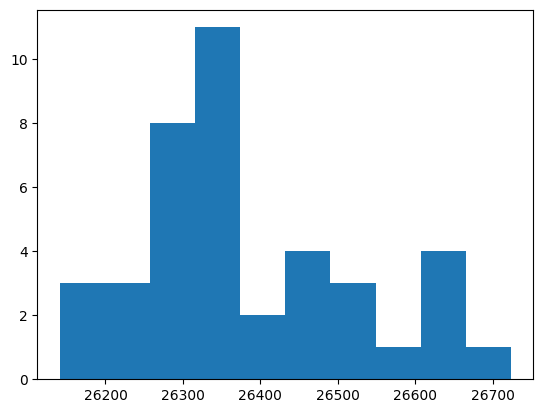

In [6]:
plt.hist(t)

In [7]:
stats.normaltest(t)

NormaltestResult(statistic=3.563045716946771, pvalue=0.16838153068205636)

In [8]:
stats.shapiro(t)

ShapiroResult(statistic=0.928326538620596, pvalue=0.01420809516012161)

В данном случае в первом тесте pvalue > 0.05

**Среднее:**

In [9]:
np.mean(t)

26384.312375108548

**Стандартное отклонение:**

In [10]:
np.std(t, ddof=1)

141.447710022378

**Стандартное отклонение среднего:**

In [11]:
np.std(t, ddof=1)/math.sqrt(len(t))

22.364846674287044

**Доверительный интервал 95%:**

In [12]:
stats.t.ppf(0.975, df = len(t) - 1)*stats.sem(t)

45.23717229609474

Полученные данные после округления:

**26,38 ± 0,05** секунд
